**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challenge 1

1. Name: Jason Rich Darmawan Onggo Putra
2. Batch: 016

## Description

### Objective

Prove that Texas is recovering from the pandemic. If not, locate where is the source of new confirmed cases.

### Problem Statement

According to the summary table from the covid19_jhu_csse_eu database, is Texas recovering from the pandemic?
recovering is represented by:
1. decreasing growth of confirmed cases.
2. decreasing growth of active cases.
3. probablly (if pandas can do it), stagnant number of deaths and increasing number of recovered.

## Working Area

In [136]:
import pandas as pd

### Data Loading

The raw data is from the [`bigquery-public-data` database](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=samples&page=dataset&_ga=2.245085957.1471931019.1642739417-486643658.1638156099).

The query used for exporting the raw data:
```
SELECT * FROM bigquery-public-data.covid19_jhu_csse_eu.summary WHERE province_state = "Texas" AND country_region = "US";
```

In [137]:
df = pd.read_csv('bq-results-20221007-053508-1665120940189.csv')

`df.head()` shows that columns `location_geom`, `fips`, `admin2` have unique values.

**Questions** before Data Cleaning:
- [x] Is columns `location_geom`, `fips`, `admin2` correlates? If yes, we can conclude that these columns are the source of data. **Assumption: Yes, with a note** [Answer](#is-columns-locationgeom-fips-admin2-correlates)
- [x] Is columnn `date` have unique value for each source of data? If yes, then this table is a time-series data. **Assumption: Yes** [Answer](#is-columnn-date-have-unique-value-for-each-source-of-data-if-yes-then-this-table-is-a-time-series-data)
- [x] Is columns `confirmed`, `deaths`, `recovered`, `active` are addition to the previous entry or the current value? If current value, then we can make a plot chart. **Assumption: Yes** [Answer](#is-columns-confirmed-deaths-recovered-active-are-addition-to-the-previous-entry-or-the-current-value-if-current-value-then-we-can-make-a-plot-chart)

In [138]:
display(df.head())
display(df.tail())

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Texas,US,2022-08-16,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10312,243,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"
1,Texas,US,2022-08-16,32.304686,-102.637655,POINT(-102.6376548 32.30468633),4425,72,NaN,NaN,48003.0,Andrews,"Andrews, Texas, US"
2,Texas,US,2022-08-16,31.254573,-94.609015,POINT(-94.60901487 31.25457347),16273,489,NaN,NaN,48005.0,Angelina,"Angelina, Texas, US"
3,Texas,US,2022-08-16,28.105562,-96.999505,POINT(-96.9995047 28.10556197),4954,91,NaN,NaN,48007.0,Aransas,"Aransas, Texas, US"
4,Texas,US,2022-08-16,33.615700,-98.687546,POINT(-98.68754589 33.61569967),2439,28,NaN,NaN,48009.0,Archer,"Archer, Texas, US"


,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
233066,Texas,US,2020-04-15,30.579337,-95.162603,POINT(-95.16260304 30.57933681),7,0,0.0,7.0,48407.0,San Jacinto,"San Jacinto, Texas, US"
233067,Texas,US,2020-04-15,28.008801,-97.517639,POINT(-97.51763891 28.00880118),8,0,0.0,8.0,48409.0,San Patricio,"San Patricio, Texas, US"
233068,Texas,US,2020-04-15,32.746138,-100.916266,POINT(-100.9162664 32.74613808),2,0,0.0,2.0,48415.0,Scurry,"Scurry, Texas, US"
233069,Texas,US,2020-04-15,31.792114,-94.145507,POINT(-94.14550696 31.79211404),46,0,0.0,46.0,48419.0,Shelby,"Shelby, Texas, US"
233070,Texas,US,2020-04-15,32.374740,-95.271757,POINT(-95.2717568 32.37474036),103,1,0.0,102.0,48423.0,Smith,"Smith, Texas, US"


#### Is columns `location_geom`, `fips`, `admin2` correlates?

**Yes**, it correlates:
1. `df.groupby(['location_geom']).count()` results: 257 rowws
2. `df.groupby(['fips']).count()` results: 255 rows
3. `df.groupby(['admin2']).count()` results: 255 rows

Note:
1. `location_geom` have 2 extra rows. Probably due to the last digit difference. [Answer](#why-location_geom-have-232173-rows-while-fips-have-233057-rows-and-admin2-have-233059-rows)

In [139]:
print('group by location_geom:', len(df.groupby(['location_geom']).count()))
print('group by fips:', len(df.groupby(['fips']).count()))
print('group by admin2:', len(df.groupby(['admin2']).count()))

group by location_geom: 257
group by fips: 255
group by admin2: 255


#### Is columnn `date` have unique value for each source of data? If yes, then this table is a time-series data.

**Yes**, column `date` have unique value for each source of data:
1. column `date` have many values.
2. for column `fips` with value `48001.0`, each `date` value is unique.

In [140]:
# temp_ variable is just to shorten formula.
temp_df = df.sort_values(['fips','date'])
display("column date have many values:", temp_df.loc[df["fips"] == 48001.0, 'date'].head())
%reset_selective -f "^temp_df$"

'column date have many values:'

118548    2020-03-22
91105     2020-03-23
214696    2020-03-24
133191    2020-03-25
15627     2020-03-26
Name: date, dtype: object

In [141]:
print("for column `fips` with value `48001.0`, each date is unique:", 
    len(df[df["fips"] == 48001.0].groupby("date").count()) == \
    len(df[df["fips"] == 48001.0].groupby("date")["date"].unique()))

for column `fips` with value `48001.0`, each date is unique: True


#### Is columns `confirmed`, `deaths`, `recovered`, `active` are addition to the previous entry or the current value? If current value, then we can make a plot chart.

**Yes**, the column values represent the current value:
1. The data below is sorted by the column `date`. Take a look at the columns `confirmed`, `deaths`, `recovered`, `active`. We can assume that the column values represent the current value, not the addition of the previous data.

In [142]:
df[df["fips"] == 48001.0].sort_values(['date']).tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
173370,Texas,US,2022-10-02,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10573,250,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"
27072,Texas,US,2022-10-03,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10577,251,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"
207283,Texas,US,2022-10-04,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10577,251,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"
220682,Texas,US,2022-10-05,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10580,251,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"
93370,Texas,US,2022-10-06,31.815347,-95.653548,POINT(-95.65354823 31.81534745),10580,251,NaN,NaN,48001.0,Anderson,"Anderson, Texas, US"


### Data Cleaning

- [x] Why `location_geom` have 232,173 rows, while `fips` have 233,057 rows and `admin2` have 233,059 rows? **Summary: it's not a mistake, every row have at least one data source** [Answer](#why-location_geom-have-232173-rows-while-fips-have-233057-rows-and-admin2-have-233059-rows)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233071 entries, 0 to 233070
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province_state  233071 non-null  object 
 1   country_region  233071 non-null  object 
 2   date            233071 non-null  object 
 3   latitude        232173 non-null  float64
 4   longitude       232173 non-null  float64
 5   location_geom   232173 non-null  object 
 6   confirmed       233071 non-null  int64  
 7   deaths          233071 non-null  int64  
 8   recovered       85426 non-null   float64
 9   active          85414 non-null   float64
 10  fips            233057 non-null  float64
 11  admin2          233059 non-null  object 
 12  combined_key    233059 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 23.1+ MB


#### Why `location_geom` have 232,173 rows, while `fips` have 233,057 rows and `admin2` have 233,059 rows?

**It's not a mistake**, every row have at least one source of data.
1. Code below shows that there is no rows with unknown data source. So, we will not drop rows because of unknown data source.

In [144]:
print("no row with unkown source data",
    len(df[df['location_geom'].isna() & df['fips'].isna() & df['admin2'].isna()]) == 0)

# 1 row with column `admin2` as the only data source.
# None have other form of data source. There is nothing we can do.
display("`location_geom` and `fips` are NaN",df[df['location_geom'].isna() & df['fips'].isna()])

# 12 rows with column `location_geom` as the only data source.
# None have other form of data source. There is nothing we can do.
display("`fips` and `admin2` are NaN",
    df[df['fips'].isna() & df['admin2'].isna()].groupby('location_geom').count())

no row with unkown source data True


'`location_geom` and `fips` are NaN'

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
227043,Texas,US,2020-03-31,NaN,NaN,NaN,680,6,0.0,0.0,NaN,Harris,"Harris,Texas,US"


'`fips` and `admin2` are NaN'

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2,combined_key
location_geom,,,,,,,,,,,,
POINT(-97.563461 31.054487),1,1,1,1,1,1,1,1,0,0,0,0
POINT(-97.5635 31.0545),11,11,11,11,11,11,11,11,0,0,0,0


#### The data below shows some columns `recovered` and `active` have `NaN` value.

**Options**:
- [x] Replace `NaN` value with the previous entry, drop the row if no previous entry. **Summary: Jason chose this**. It takes 1m 6.8s to replace `NaN` value for row with column `admin2` == `Anderson` / or `579 * 2` entries.
- [ ] Do not visualize the data after the first `NaN` value / remove every rows after the first `NaN` value. **Disadvantage: shorter line plot**
- [ ] Remove every columns `recovered` and `active` that have `NaN` value. **Disadvantage: the line plot will have dotted line.**

In [145]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233071 entries, 0 to 233070
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province_state  233071 non-null  object 
 1   country_region  233071 non-null  object 
 2   date            233071 non-null  object 
 3   latitude        232173 non-null  float64
 4   longitude       232173 non-null  float64
 5   location_geom   232173 non-null  object 
 6   confirmed       233071 non-null  int64  
 7   deaths          233071 non-null  int64  
 8   recovered       85426 non-null   float64
 9   active          85414 non-null   float64
 10  fips            233057 non-null  float64
 11  admin2          233059 non-null  object 
 12  combined_key    233059 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 23.1+ MB


None

#### Replace `NaN` value with the latest entry.

The assumption is that the data source chose not to fill out the field after a while and then continue to fill the field at another time. So, it is worthile to replace `NaN` value with previous entry instead of deleting rows after the first `NaN` value.

There are 233,059 entries, to shorten the analysis time, we will choose only entries with column `admin2` == `Anderson`. By coincidence, `Anderson` chose not to fill the `recovered` column from day one. The prove it, we will use `df2.describe()` to show that the **min** and **max** value for column `recovered` are `0.0`, which indicates that `Anderson` chose not to fill the columns.

In [146]:
df2 = df.sort_values(['admin2', 'date']).copy()

In [147]:
display("column recovered min and max values are 0.0", 
    df2.loc[df2['admin2'] == 'Anderson', ['confirmed','deaths','recovered','active']]
       .describe())

'column recovered min and max values are 0.0'

,confirmed,deaths,recovered,active
count,929.000000,929.000000,350.0,350.000000
mean,6120.273412,131.844995,0.0,2540.625714
std,3265.327049,89.164475,0.0,1940.764898
min,0.000000,0.000000,0.0,0.000000
25%,3021.000000,41.000000,0.0,991.250000
50%,6240.000000,133.000000,0.0,2726.000000
75%,9445.000000,225.000000,0.0,3193.750000
max,10580.000000,251.000000,0.0,5967.000000


In [148]:
def findFirstInvalidLabelIndex(admin2: str, column: str) -> int:
    """
    New knowledge:
    df2.loc[df2['admin2'] == admin2] return a view
    df2[df2['admin2] == admin2] return a copy
    """
    # A -> findFirstInvalidLabelIndex() and firstFirstValidLabelIndex()
    # B
    index = df2.loc[df2['admin2'] == admin2, column].isna().idxmax()
    if index == findFirstValidLabelIndex(admin2, column):
        return -1
    return index

def findFirstValidLabelIndex(admin2: str, column: str) -> int | None:
    return df2.loc[df2['admin2'] == admin2, column].first_valid_index()

def findLastValidLabelIndex(admin2: str, column: str) -> int | None:
    return df2.loc[df2['admin2'] == admin2, column].last_valid_index()

def replaceFirstInvalidIndexWithValidIndex(admin2: str, column: str):
    """
    New knolwedge:
    df2.loc[firstInvalidIndex][column] is a copy.
    It's called `chained indexing`, it is not guaranteed to work.
    df2.loc[firstInvalidIndex, column] is a view.
    """
    firstInvalidLabelIndex = findFirstInvalidLabelIndex(admin2, column)
    if firstInvalidLabelIndex == -1:
        return

    firstValidLabelIndex = findFirstValidLabelIndex(admin2, column)
    if firstValidLabelIndex == None:
        return

    lastValidLabelIndex = findLastValidLabelIndex(admin2, column)
    if lastValidLabelIndex == None:
        return
    
    global df2
    # scenario 1:
    # NaN -> drop
    # A
    # NaN
    if df2.index.get_loc(firstInvalidLabelIndex) < \
            df2.index.get_loc(firstValidLabelIndex):
        df2 = df2.drop(labels=firstInvalidLabelIndex)
        return
    # scenario 2:
    # A
    # NaN -> assign A
    # B
    # NaN -> assign B
    if df2.index.get_loc(firstInvalidLabelIndex) > \
            df2.index.get_loc(firstValidLabelIndex):
        # scenario 3:
        # A   -> firstValidLabelIndex
        # A
        # B   -> lastValidLabelIndex
        # NaN -> firstInvalidLabelIndex
        if df2.index.get_loc(lastValidLabelIndex) != 0:
            df2.loc[firstInvalidLabelIndex, column] = df2.loc[lastValidLabelIndex, column]
            return
        # scenario 2: ...
        df2.loc[firstInvalidLabelIndex, column] = df2.loc[firstValidLabelIndex, column]
        return

display("entries with column `admin2` == `Anderson` before replacing the NaN values in columns `recovered` and `active`", 
    df2.loc[df['admin2'] == 'Anderson'].info())

# for admin in df2.groupby('admin2').groups.keys():
for admin in ['Anderson']:
    for column in ['recovered', 'active']:
        while findFirstInvalidLabelIndex('Anderson', column) != -1:
            replaceFirstInvalidIndexWithValidIndex('Anderson', column)

display("entries with column `admin2` == `Anderson` after replacing the NaN values in columns `recovered` and `active`", 
    df2.loc[df['admin2'] == 'Anderson'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 118548 to 93370
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  929 non-null    object 
 1   country_region  929 non-null    object 
 2   date            929 non-null    object 
 3   latitude        929 non-null    float64
 4   longitude       929 non-null    float64
 5   location_geom   929 non-null    object 
 6   confirmed       929 non-null    int64  
 7   deaths          929 non-null    int64  
 8   recovered       350 non-null    float64
 9   active          350 non-null    float64
 10  fips            929 non-null    float64
 11  admin2          929 non-null    object 
 12  combined_key    929 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 101.6+ KB


'entries with column `admin2` == `Anderson` before replacing the NaN values in columns `recovered` and `active`'

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 118548 to 93370
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  929 non-null    object 
 1   country_region  929 non-null    object 
 2   date            929 non-null    object 
 3   latitude        929 non-null    float64
 4   longitude       929 non-null    float64
 5   location_geom   929 non-null    object 
 6   confirmed       929 non-null    int64  
 7   deaths          929 non-null    int64  
 8   recovered       929 non-null    float64
 9   active          929 non-null    float64
 10  fips            929 non-null    float64
 11  admin2          929 non-null    object 
 12  combined_key    929 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 101.6+ KB


'entries with column `admin2` == `Anderson` after replacing the NaN values in columns `recovered` and `active`'

None

### Explorasi Data

1. The Line Chart shows that `Anderson, Texas, US` has a trend of increaasing confirmed covid cases from 2020-03-22 to 2022-05-31. [Answer](#andersons-overview)
2. `Anderson, Texas, US` stopped to fill the column `recovered` from day one with value `0.0` and later `NaN` value and column `active` starting from 2021-03-07 [Answer](#when-does-column-admin2--anderson-stop-filling-the-column-recovered). 

#### Anderson's Overview

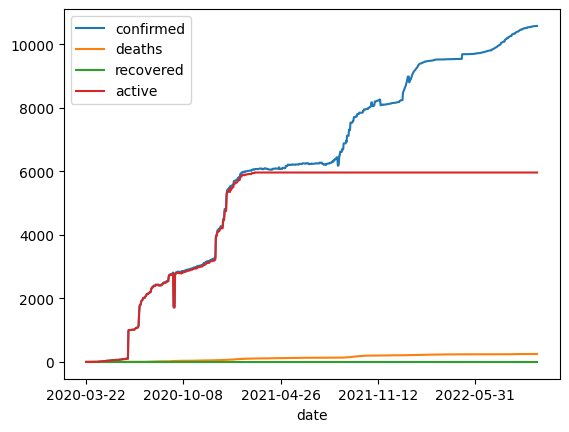

In [150]:
display(df2.loc[df2['admin2'] == 'Anderson']
           .groupby('date')[['confirmed','deaths','recovered','active']]
           .sum()
           .plot()
           .legend())

#### When does column `admin2` == `Anderson` stop filling the column `recovered`?

1. column `admin2` == `Anderson` stopped filling the column `recovered` starting from `2021-03-07`.
2. There are column `recovered` with `Non-NaN` value after `2021-03-07`.

In [151]:
temp_df = df.sort_values(['admin2', 'date']).copy()
temp_firstInvalidLabelIndex = temp_df.loc[temp_df['admin2'] == 'Anderson', 'recovered'] \
                                     .isna() \
                                     .idxmax()
# calling DataFrame.index will return the label indexes.
# calling index -1, will return the last index.
temp_lastLabelIndex = temp_df.loc[temp_df['admin2'] == 'Anderson'].tail().index[-1]

display("first row column recovered with NaN value", 
       # calling `temp_df.loc[ label index ]` to display the row instead of only displaying the label index.
       temp_df.loc[temp_firstInvalidLabelIndex])
print("in column recovered, there are non-NaN value after the first label index with NaN value:", 
       # calling `temp_df.loc[ ... : ... ]` will return the DafaFrame between the label index.
        temp_df.loc[temp_firstInvalidLabelIndex:temp_lastLabelIndex,'recovered']
               .notna()
               .any())

'first row column recovered with NaN value'

province_state                              Texas
country_region                                 US
date                                   2021-03-07
latitude                                31.815347
longitude                              -95.653548
location_geom     POINT(-95.65354823 31.81534745)
confirmed                                    6073
deaths                                        109
recovered                                     NaN
active                                        NaN
fips                                      48001.0
admin2                                   Anderson
combined_key                  Anderson, Texas, US
Name: 77138, dtype: object

in column recovered, there are non-NaN value after the first label index with NaN value: False


#### When does column `admin2` == `Anderson` stop filling the column `active`?

In [152]:
temp_firstInvalidLabelIndex = temp_df.loc[temp_df['admin2'] == 'Anderson', 'active'] \
                                     .isna() \
                                     .idxmax()
# calling DataFrame.index will return the label indexes.
# calling index -1, will return the last index.
temp_lastLabelIndex = temp_df.loc[temp_df['admin2'] == 'Anderson'].tail().index[-1]

display("first row column active with NaN value", 
       # calling `temp_df.loc[ label index ]` to display the row instead of only displaying the label index.
       temp_df.loc[temp_firstInvalidLabelIndex])
print("in column active, there are non-NaN value after the first label index with NaN value:", 
       # calling `temp_df.loc[ ... : ... ]` will return the DafaFrame between the label index.
        temp_df.loc[temp_firstInvalidLabelIndex:temp_lastLabelIndex,'active']
               .notna()
               .any())

'first row column active with NaN value'

province_state                              Texas
country_region                                 US
date                                   2021-03-07
latitude                                31.815347
longitude                              -95.653548
location_geom     POINT(-95.65354823 31.81534745)
confirmed                                    6073
deaths                                        109
recovered                                     NaN
active                                        NaN
fips                                      48001.0
admin2                                   Anderson
combined_key                  Anderson, Texas, US
Name: 77138, dtype: object

in column active, there are non-NaN value after the first label index with NaN value: False


## Conclusions, Assumptions, Overall Analysis

`put your conclusions here`